<a href="https://colab.research.google.com/github/melia1702/Pertemuan-pertama/blob/main/Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving FOTOOO.jpg to FOTOOO.jpg


In [3]:
def analyze_my_image(image_path):
    """Analyze your own image"""

    img = cv2.imread(image_path)

    if img is None:
        raise ValueError("Gambar tidak ditemukan. Periksa path file!")

    # 1. Dimensi & resolusi
    height, width, channels = img.shape
    resolution = width * height

    # 2. Aspect ratio
    aspect_ratio = width / height

    # 3. Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 4. Statistik
    stats = {
        "mean": float(np.mean(img)),
        "std": float(np.std(img)),
        "min": int(np.min(img)),
        "max": int(np.max(img))
    }

    # 5. Histogram
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(gray.ravel(), bins=256)
    plt.title("Histogram Grayscale")

    plt.subplot(1,2,2)
    colors = ['b','g','r']
    for i, c in enumerate(colors):
        plt.plot(cv2.calcHist([img],[i],None,[256],[0,256]), color=c)
    plt.title("Histogram RGB")

    plt.tight_layout()
    plt.show()

    # 6. Tampilkan citra
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Citra Asli")
    plt.show()

    return {
        "width": width,
        "height": height,
        "resolution": resolution,
        "aspect_ratio": aspect_ratio,
        "stats": stats
    }


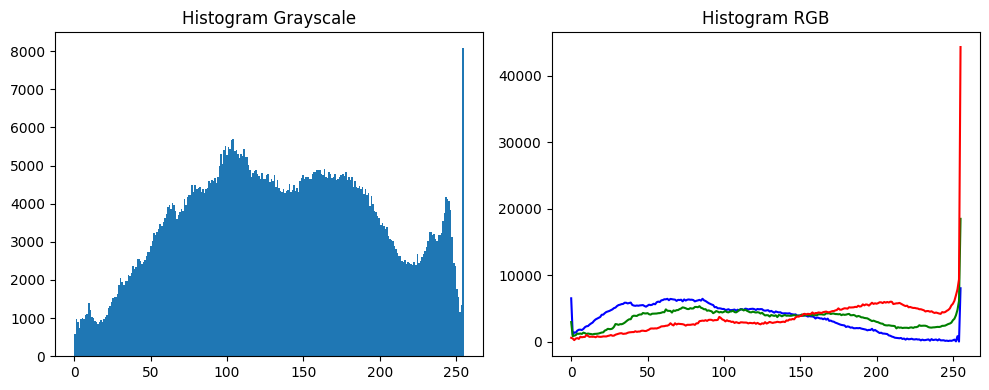

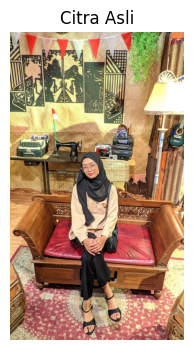

Analisis selesai


In [4]:
hasil = analyze_my_image("FOTOOO.jpg")
print("Analisis selesai")

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_digitization(analog_signal, sampling_rate, quantization_levels):
    # Sinyal kontinu
    t_cont = np.linspace(0, 1, 1000)
    x_cont = analog_signal(t_cont)

    # 1. Sampling
    t_sampled = np.linspace(0, 1, sampling_rate)
    x_sampled = analog_signal(t_sampled)

    # 2. Quantization
    min_val = np.min(x_sampled)
    max_val = np.max(x_sampled)
    q_levels = np.linspace(min_val, max_val, quantization_levels)

    x_quantized = np.zeros_like(x_sampled)
    for i, val in enumerate(x_sampled):
        x_quantized[i] = q_levels[np.argmin(np.abs(q_levels - val))]

    # 3. Plot hasil
    plt.figure(figsize=(10, 5))
    plt.plot(t_cont, x_cont, label='Sinyal Analog (Kontinu)', linewidth=2)
    plt.stem(t_sampled, x_quantized,
             linefmt='r-',
             markerfmt='ro',
             basefmt='k-',
             label='Sinyal Digital')
    plt.legend()
    plt.xlabel('Waktu')
    plt.ylabel('Amplitudo')
    plt.title('Simulasi Sampling dan Kuantisasi')
    plt.grid()
    plt.show()

    return t_sampled, x_quantized


In [7]:
def analog_signal(t):
    return np.sin(2 * np.pi * 5 * t)


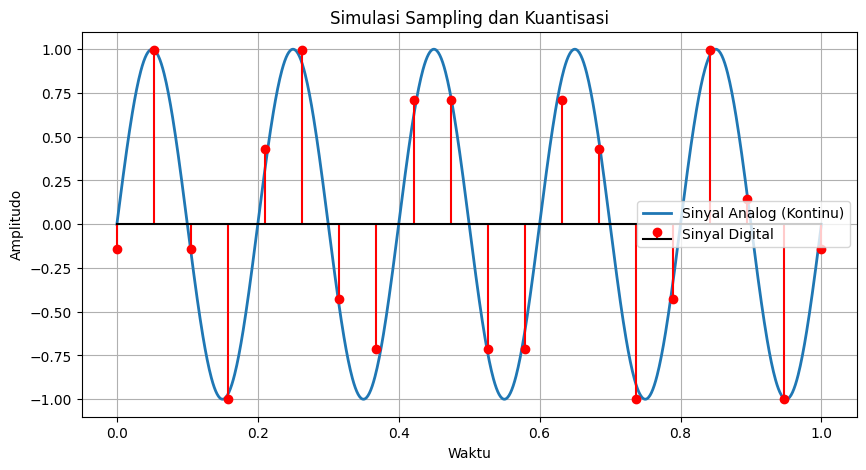

In [8]:
analog_signal = lambda t: np.sin(2 * np.pi * 5 * t)

t_digital, x_digital = simulate_digitization(
    analog_signal,
    sampling_rate=20,
    quantization_levels=8
)